# Manipulating tabular data with `Pandas`

## Recap

Let's continue with our skills inventory with the foundations/applications dichotomy:
- foundational programming skills
    * basic mathematical operations, comparison operators
    * iteration and recursion with loop control structures `for` and `while`
    * keeping track of variables outside of loops (i.e., counting and summing)
    * function definition and using functions *inside* of loops
    * conditionals: `if`, `else`, and `elif`
    * types: `int`, `float`, `string`, `bool`
    * containers such as `list` and `dict`
    * randm number generation
    * accessing and iterating over elements in lists and dicts
    * file I/O
    * DEBUGGING!
    * algorithmic thinking
- applications
    * basic (and semi-advanced) data visualization: histograms, scatter plots, higher-dimensions in 2-d
    * fitting models to data and extracting results (with uncertainties)
    * text analysis, asking questions with unstructured data
    * simulating the solutions to ordinary differential equations, Euler Algorithm
    * basic Monte Carlo techniques

I am running out of congratulatory things to say about the length and diversity of this list, so I'll just summarize with: **Wowzerz**.

***

## Motivation

One motivations bit for you today!  After today's class, you will have all of the basic skills necessary to start learning about Machine Learning (if you wish to do so).  A Kaggle Competition is a great place to start!

- Kaggle. [Titanic -- Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic).  Skip forward to 2:00 in the explanatory video linked.

***

## What is pandas?

From [Wikipedia](https://en.wikipedia.org/wiki/Giant_panda)

> The giant panda (Ailuropoda melanoleuca; Chinese: 大熊猫; pinyin: dàxióngmāo) also known as the panda bear (or simply the panda), is a bear species endemic to China. It is characterised by its bold black-and-white coat and rotund body. The name "giant panda" is sometimes used to distinguish it from the red panda, a neighboring musteloid.

These pandas do not manage tabular data; rather, they eat bamboo.

OK, thanks!  Homework is due in one week.

## Ahem... What is `pandas`?

`pandas` is a very popular `python` library that is built to manage tabular data.  By "tabular data" we mean something like a spreadsheet -- information that is arranged into separate instances (typically rows) and features (typically columns).

Now, we have already worked with tabular data in this class.  We read data from a file (usually CSV formatted) using some basic file I/O procedures (`readline()`, `string.split()`, etc.).  When we introduced this, you may have thought to yourself "There has **got** to be a better, more-efficient way of doing this!"  If you thought this, you were correct!  `pandas` is the better, more-efficient way of working with tabular data in `python`.

In this tutorial, we're going to cover the basics of `pandas` fucntionality, but it's important to state that `pandas` is *soooooo powerful* that it is a professional-grade tool, ubiquitous in the quantitative world!  Researchers in the physical sciences, social sciences, finance, medicine, and public health use `pandas` to work with large, complex, real-world data.  As a result, there is a great wealth of `pandas` information and help online!

There are (at least) two ways to introduce `pandas`: from the basic `pandas` structures up to the tabular dataset level, or from the tabular dataset level down to the basic structures.  We'll take the first approach, but you might consider going through this notebook backwards to see how the concepts connect in the opposite way.

***

## `pandas` `Series`

`pandas` organizes data based on two structures: `Series` and `DataFrame`. `DataFrames` are composed of `Series`(es). 

The structure of `Series` [(documentation here, take a look at all of those attributes/methods!)](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) will seem familiar to you -- it's basically an ordered list with a lot of other slick features built into it!  Let's take iport the module and initialize a `Series` to see what it can do.

We'll start with some data stored as a basic `python` list and then convert convert it to a `Series`.  Ooh, let's do some role-playing, too: We are the managers of a restaurant, and we want to build a dataset that contains information about our menu.

In [1]:
import numpy as np
import pandas as pd
from rich import print ## comment out if you don't have rich installed

menu = ['aloo chana', 'cheeseburger', 'jjajangmeon', 'cacio e pepe', 'bubble tea', '', 
        'paleta', 'enchiladas', 'cauliflower shawarma', 'tikil gomen']

menu_ser = pd.Series(menu)

print(menu_ser)

0              aloo chana
1            cheeseburger
2             jjajangmeon
3            cacio e pepe
4              bubble tea
5                        
6                  paleta
7              enchiladas
8    cauliflower shawarma
9             tikil gomen
dtype: object

At this point, `Series` looks pretty boring.  It's basically a list with more-sophisticated `print` formatting. Notice that when the `Series` is printed, it happens in two dimensions -- the first column is the *index column* and the second column is the *value column*.

Ok, so what can we do with this?  Well, `Series` has many nice features that align with the types of things that scientists like to do with data!  Let's blast through a few (of the many, many) of these below.

In [2]:
menu_ser.name = 'dish'
print(menu_ser)

0              aloo chana
1            cheeseburger
2             jjajangmeon
3            cacio e pepe
4              bubble tea
5                        
6                  paleta
7              enchiladas
8    cauliflower shawarma
9             tikil gomen
Name: dish, dtype: object

Appending to a `Series` is complicated!  We need to first create a `Series` of the stuff that we want to append, and then `append` the new series to the original.

In [3]:
new_dishes = ['quesadilla', 'jollof rice', 'grilled chili peppers', 'ma la fish', 'schnitzel', 'empanadas']
new_ser = pd.Series(new_dishes, name='dish')
print(new_ser)

print(menu_ser.append(new_ser))

0               quesadilla
1              jollof rice
2    grilled chili peppers
3               ma la fish
4                schnitzel
5                empanadas
Name: dish, dtype: object

0               aloo chana
1             cheeseburger
2              jjajangmeon
3             cacio e pepe
4               bubble tea
5                         
6                   paleta
7               enchiladas
8     cauliflower shawarma
9              tikil gomen
0               quesadilla
1              jollof rice
2    grilled chili peppers
3               ma la fish
4                schnitzel
5                empanadas
Name: dish, dtype: object

***It is VERY important to realize*** that the `append` call above does **NOT** change the original series by default.  That is, when we append the new `Series` to the old, the result that is created is **not stored** in either of the original variables!  This might seem annoying (and it *is* annoying), but `pandas` works this way so that it is very difficult to *accidentally* change your data in some catastrophic way.

If we want to append and then replace the original `Series`, we have to replace the old one "by hand":

In [4]:
menu_ser = pd.Series(menu, name='dish')
menu_ser = menu_ser.append(new_ser)
print(menu_ser)

0               aloo chana
1             cheeseburger
2              jjajangmeon
3             cacio e pepe
4               bubble tea
5                         
6                   paleta
7               enchiladas
8     cauliflower shawarma
9              tikil gomen
0               quesadilla
1              jollof rice
2    grilled chili peppers
3               ma la fish
4                schnitzel
5                empanadas
Name: dish, dtype: object

You may notice that the indices are goofed up!  The `Series` that I appended had its own index system when I created it, and we now have *duplicate indices*.  We can solve this by including the `ignore_index=True` argument when we call `append`.  (Try it above!)

Access of individual elements of the `Series` is a little bit more complicated (but more flexible) than it is with a basic `list`:

In [5]:
menu_ser.reset_index(drop=True, inplace=True)
print(menu_ser)

0                aloo chana
1              cheeseburger
2               jjajangmeon
3              cacio e pepe
4                bubble tea
5                          
6                    paleta
7                enchiladas
8      cauliflower shawarma
9               tikil gomen
10               quesadilla
11              jollof rice
12    grilled chili peppers
13               ma la fish
14                schnitzel
15                empanadas
Name: dish, dtype: object

In [6]:
print(menu_ser.iloc[3])
print()
print(menu_ser.iloc[2:6])
print()
print(menu_ser.iloc[-1])

cacio e pepe

2     jjajangmeon
3    cacio e pepe
4      bubble tea
5                
Name: dish, dtype: object

empanadas

We can also access elements of the `Series` by value!  The syntax below looks really odd at first, but it is in some ways similar the way that we access elements of a `dictionary`.

In [7]:
print(menu_ser[menu_ser == 'quesadilla'])
print()
print(menu_ser[menu_ser == 'quesadilla'].index[0])

10    quesadilla
Name: dish, dtype: object

10

Some other handy features:

In [8]:
print(menu_ser.size)
print('- - - - - - - - -')
print()

print(menu_ser.sort_values())
print('- - - - - - - - -')
print()

# let's see if we can get rid of that empty entry
menu_ser = menu_ser[menu_ser != '']
menu_ser.name = 'dish'
menu_ser.reset_index(drop=True, inplace=True)
print(menu_ser)
print(menu_ser.size)
print('- - - - - - - - -')
print()

print(menu_ser.values)


16

- - - - - - - - -

5                          
0                aloo chana
4                bubble tea
3              cacio e pepe
8      cauliflower shawarma
1              cheeseburger
15                empanadas
7                enchiladas
12    grilled chili peppers
2               jjajangmeon
11              jollof rice
13               ma la fish
6                    paleta
10               quesadilla
14                schnitzel
9               tikil gomen
Name: dish, dtype: object

- - - - - - - - -

0                aloo chana
1              cheeseburger
2               jjajangmeon
3              cacio e pepe
4                bubble tea
5                    paleta
6                enchiladas
7      cauliflower shawarma
8               tikil gomen
9                quesadilla
10              jollof rice
11    grilled chili peppers
12               ma la fish
13                schnitzel
14                empanadas
Name: dish, dtype: object

15

- - - - - - - - -

['aloo chana' 'cheeseburger' 'jjajangmeon' 'cacio e pepe' 'bubble tea'
 'paleta' 'enchiladas' 'cauliflower shawarma' 'tikil gomen' 'quesadilla'
 'jollof rice' 'grilled chili peppers' 'ma la fish' 'schnitzel'
 'empanadas']

***

While we're at it let's create a couple more `Series` that contain other information about these items from our imaginary restaurant:

0     10.0
1      8.0
2     12.0
3     12.0
4      4.0
5      2.5
6     11.0
7      9.0
8     10.0
9      6.0
10     9.0
11     2.0
12    16.0
13    16.0
14     8.0
Name: price, dtype: float64

- - - - - - - - -

0     450
1     280
2     400
3     500
4     300
5     220
6     475
7     250
8     300
9     450
10    400
11    100
12    480
13    500
14    400
Name: mass, dtype: int64

- - - - - - - - -

0      9
1      2
2      6
3      2
4      0
5      0
6      7
7      7
8      4
9      7
10     4
11    10
12    10
13     2
14     6
Name: spiciness, dtype: int64

- - - - - - - - -

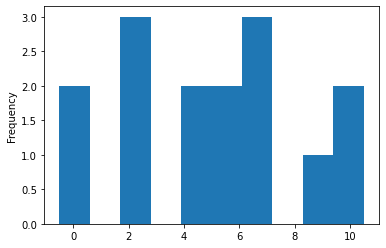

In [9]:
prices = [10.00, 8.00, 12.00, 12.00, 4.00, 2.50, 11.00, 9.00, 10.00, 6.00, 9.00, 2.00, 16.00, 16.00, 8.00]
prices_ser = pd.Series(prices, name='price')
print(prices_ser)
print('- - - - - - - - -')
print()

masses = [450, 280, 400, 500, 300, 220, 475, 250, 300, 450, 400, 100, 480, 500, 400]
masses_ser = pd.Series(masses, name='mass')
print(masses_ser)
print('- - - - - - - - -')
print()

spicy = [9, 2, 6, 2, 0, 0, 7, 7, 4, 7, 4, 10, 10, 2, 6]
spicy_ser = pd.Series(spicy, name='spiciness')
print(spicy_ser)
spicy_ser.plot.hist(range=(-0.5,10.5), bins=10)
print('- - - - - - - - -')
print()

Note the built-in plot functionality of `Series`!

OK!  We now have three **separate** series that contain information about the **same set of entities**.  

**Let's pause**.  This is basically where were were in our previous tabular data manipulations.  We would read lines of information from a file, split the line into individual features, and then append these individual features to separate lists for later computation, visualization, *etc.*  Using `Series` to store this information makes it very clear how inefficient/stupid this approach is.  Notice that the indices in our three separate series all point to the same instances -- that is, index 1 refers to features of the cheeseburger in `names_ser`, `prices_ser`, and `masses_ser`.  Having three copies of the same set of indices is a big waste of data!

In addition, if we want to perform some manipulation of one of the series, say sorting the items by price, sorting the `Series` that stores price information will not automatically sort the other two series.  Everything I've just said is true of storing this information in three separate lists.

Both of these shortcoming arise from the fact that we are (and were) storing tabular, multidimensional data in several different, unconnected containers.  Hmmmmm, if only there were some way to combine all of these series into a single coherent thingy...

***

## `pandas` `DataFrame`

In the examples above, we were using `Series` to store and manipulate what are essentially columns in a tabular dataset.  Picture a spreadsheet in which each row is an item on a restaurant menu, and each column represents features like the item's name, price, mass, and spiciness.  Manipulating these columns separately from one another is possible, but opens the door wide for mistakes, errors, goof-ups, oopsies, oversights, negligencies, blunders, fumbles, ...

A `pandas` `DataFrame` is a structure that stores this tabular all at once, manipulating rows and columns in concert.  The `DataFrame` object has many built-in operations that are useful for data science, AND has lots of built-in protections to prevent us from doing things that we might not wish to do.

We can create a `DataFrame` from the individual series that we created in the previous section:

In [10]:
series = [menu_ser, prices_ser, masses_ser, spicy_ser]
menu_df = pd.concat(series, axis=1)
print(menu_df)
print(type(menu_df))

dish  price  mass  spiciness
0              aloo chana   10.0   450          9
1            cheeseburger    8.0   280          2
2             jjajangmeon   12.0   400          6
3            cacio e pepe   12.0   500          2
4              bubble tea    4.0   300          0
5                  paleta    2.5   220          0
6              enchiladas   11.0   475          7
7    cauliflower shawarma    9.0   250          7
8             tikil gomen   10.0   300          4
9              quesadilla    6.0   450          7
10            jollof rice    9.0   400          4
11  grilled chili peppers    2.0   100         10
12             ma la fish   16.0   480         10
13              schnitzel   16.0   500          2
14              empanadas    8.0   400          6

<class 'pandas.core.frame.DataFrame'>

Wow!  Now that probably looks familiar!  Our tabular data is organized as a table, in which it's clear which feature values are associated with which items.  Each of our feature columns is nicely labeled with the `name` property of the `Series` that we used to create it!

There are lots of great ways to manipulate a `DataFrame`!  (Notice that Jupyter knows how to nicely typeset a dataframe, too!)  We can sort:

In [11]:
menu_df.sort_values(by=['price'])

,dish,price,mass,spiciness
11,grilled chili peppers,2.0,100,10
5,paleta,2.5,220,0
4,bubble tea,4.0,300,0
9,quesadilla,6.0,450,7
1,cheeseburger,8.0,280,2
14,empanadas,8.0,400,6
7,cauliflower shawarma,9.0,250,7
10,jollof rice,9.0,400,4
0,aloo chana,10.0,450,9
8,tikil gomen,10.0,300,4


In [12]:
menu_df.sort_values(by=['price', 'dish'], ascending=False)

,dish,price,mass,spiciness
13,schnitzel,16.0,500,2
12,ma la fish,16.0,480,10
2,jjajangmeon,12.0,400,6
3,cacio e pepe,12.0,500,2
6,enchiladas,11.0,475,7
8,tikil gomen,10.0,300,4
0,aloo chana,10.0,450,9
10,jollof rice,9.0,400,4
7,cauliflower shawarma,9.0,250,7
14,empanadas,8.0,400,6


We can add new features (columns), as long as we're careful to order the new feature values relative to the dataframe index:

In [13]:
print(menu_df)
vegan_list = [True, False, False, True, True, True, False, False, True, True, False, True, False, False, False]
menu_df['vegan'] = vegan_list
cuisines_list = ['Indian', 'American', 'Korean', 'Italian', 'Taiwanese', 
                 'Central American', 'Tex-Mex', 'Middle-Eastern', 'Ethiopian', 'Tex-Mex', 
                 'West African', '', 'Sichuan', 'German', 'Argentinian']
menu_df['cuisine'] = cuisines_list
costs_list = [7.00, 4.00, 4.00, 4.50, 2.00, 0.50, 3.00, 7.00, 4.00, 2.00, 7.00, 0.25, 13.50, 9.00, 3.50]
menu_df['cost'] = costs_list
menu_df

dish  price  mass  spiciness
0              aloo chana   10.0   450          9
1            cheeseburger    8.0   280          2
2             jjajangmeon   12.0   400          6
3            cacio e pepe   12.0   500          2
4              bubble tea    4.0   300          0
5                  paleta    2.5   220          0
6              enchiladas   11.0   475          7
7    cauliflower shawarma    9.0   250          7
8             tikil gomen   10.0   300          4
9              quesadilla    6.0   450          7
10            jollof rice    9.0   400          4
11  grilled chili peppers    2.0   100         10
12             ma la fish   16.0   480         10
13              schnitzel   16.0   500          2
14              empanadas    8.0   400          6

,dish,price,mass,spiciness,vegan,cuisine,cost
0,aloo chana,10.0,450,9,True,Indian,7.00
1,cheeseburger,8.0,280,2,False,American,4.00
2,jjajangmeon,12.0,400,6,False,Korean,4.00
3,cacio e pepe,12.0,500,2,True,Italian,4.50
4,bubble tea,4.0,300,0,True,Taiwanese,2.00
5,paleta,2.5,220,0,True,Central American,0.50
6,enchiladas,11.0,475,7,False,Tex-Mex,3.00
7,cauliflower shawarma,9.0,250,7,False,Middle-Eastern,7.00
8,tikil gomen,10.0,300,4,True,Ethiopian,4.00
9,quesadilla,6.0,450,7,True,Tex-Mex,2.00


We can also grab a subset of the dataframe based on values!  What if a customer asks about vegan options?

In [14]:
menu_df[menu_df['vegan'] == True]

,dish,price,mass,spiciness,vegan,cuisine,cost
0,aloo chana,10.0,450,9,True,Indian,7.00
3,cacio e pepe,12.0,500,2,True,Italian,4.50
4,bubble tea,4.0,300,0,True,Taiwanese,2.00
5,paleta,2.5,220,0,True,Central American,0.50
8,tikil gomen,10.0,300,4,True,Ethiopian,4.00
9,quesadilla,6.0,450,7,True,Tex-Mex,2.00
11,grilled chili peppers,2.0,100,10,True,,0.25


Where possible, `DataFrame` can use the names of the features/columns as attributes of the dataframe.  What the heck does this mean?  It means that the block below does the same as the block above.

In [15]:
menu_df[menu_df.vegan == True]

,dish,price,mass,spiciness,vegan,cuisine,cost
0,aloo chana,10.0,450,9,True,Indian,7.00
3,cacio e pepe,12.0,500,2,True,Italian,4.50
4,bubble tea,4.0,300,0,True,Taiwanese,2.00
5,paleta,2.5,220,0,True,Central American,0.50
8,tikil gomen,10.0,300,4,True,Ethiopian,4.00
9,quesadilla,6.0,450,7,True,Tex-Mex,2.00
11,grilled chili peppers,2.0,100,10,True,,0.25


What if a customer asks about vegan options and is very hungry?

In [16]:
menu_df[menu_df.vegan == True][menu_df.mass >= 400].sort_values(by=['mass'], ascending=False)

/var/folders/gf/hlznghl533773bhf4bgw_89dxt2gyn/T/ipykernel_88456/3334794991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  menu_df[menu_df.vegan == True][menu_df.mass >= 400].sort_values(by=['mass'], ascending=False)


,dish,price,mass,spiciness,vegan,cuisine,cost
3,cacio e pepe,12.0,500,2,True,Italian,4.5
0,aloo chana,10.0,450,9,True,Indian,7.0
9,quesadilla,6.0,450,7,True,Tex-Mex,2.0


Yum, lots of great options!

#### Warm-up problem

Add a new item to the menu using a dictionary (Google it!).  Make up values for the relevant features!

In [17]:
## hot dog code goes here!

***

The real utility of a `DataFrame` for our purposes is the ability to do calculations with data in the dataframe simultaneously for all rows.  Let's say we want to add a reasonable tip (20%) to each item's price:

In [18]:
menu_df['price_w_tip'] = menu_df['price'] + menu_df['price'] * 0.20
menu_df

,dish,price,mass,spiciness,vegan,cuisine,cost,price_w_tip
0,aloo chana,10.0,450,9,True,Indian,7.00,12.0
1,cheeseburger,8.0,280,2,False,American,4.00,9.6
2,jjajangmeon,12.0,400,6,False,Korean,4.00,14.4
3,cacio e pepe,12.0,500,2,True,Italian,4.50,14.4
4,bubble tea,4.0,300,0,True,Taiwanese,2.00,4.8
5,paleta,2.5,220,0,True,Central American,0.50,3.0
6,enchiladas,11.0,475,7,False,Tex-Mex,3.00,13.2
7,cauliflower shawarma,9.0,250,7,False,Middle-Eastern,7.00,10.8
8,tikil gomen,10.0,300,4,True,Ethiopian,4.00,12.0
9,quesadilla,6.0,450,7,True,Tex-Mex,2.00,7.2


Now that we know the total cost of each item, we may want to determine something like the "best value" dish on the menu (assuming that all of the flavors are equally enjoyable).  We could do the following:

In [19]:
menu_df['mass_per_dollar'] = np.round(menu_df['mass'] / menu_df['price_w_tip'], 4)

print('Median mass per dollar of items on our menu:', '\t', menu_df['mass_per_dollar'].median(), 'g/USD')
print('Average mass per dollar of items on our menu:', '\t', menu_df['mass_per_dollar'].mean(), 'g/USD')
print('Std dev mass per dollar of items on our menu:', '\t', menu_df['mass_per_dollar'].std(), 'g/USD')

print('- - - - - - - -')
menu_df[menu_df.mass_per_dollar == menu_df.mass_per_dollar.max()]

Median mass per dollar of items on our menu:     35.9848 g/USD

Average mass per dollar of items on our menu:    38.86966666666667 g/USD

Std dev mass per dollar of items on our menu:    15.502464025606963 g/USD

- - - - - - - -

,dish,price,mass,spiciness,vegan,cuisine,cost,price_w_tip,mass_per_dollar
5,paleta,2.5,220,0,True,Central American,0.5,3.0,73.3333


So maybe we just buy \\$15 worth of paletas?

Our dataframe now combines raw data and interesting calculated quantities.  Let's look at some visualizations of this information.

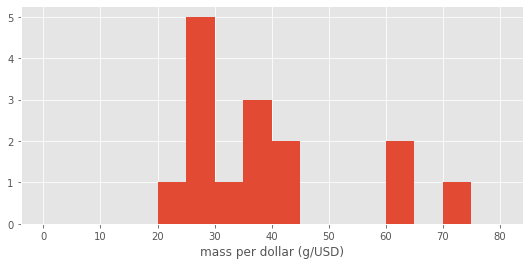

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(9,4))
menu_df.mass_per_dollar.hist(range=(0,80), bins=16)
plt.xlabel('mass per dollar (g/USD)')
plt.show()

/var/folders/gf/hlznghl533773bhf4bgw_89dxt2gyn/T/ipykernel_88456/1031126710.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


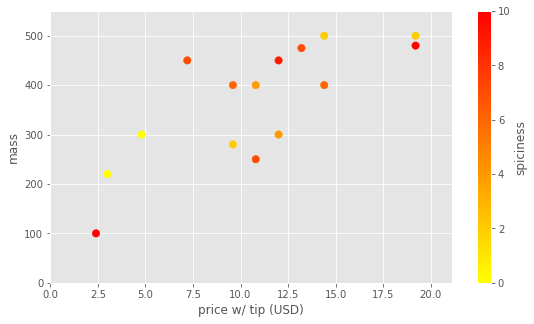

In [21]:
fig = plt.figure(figsize=(9,5))
plt.scatter(menu_df.price_w_tip, menu_df.mass, c=menu_df.spiciness, s=55, cmap='autumn_r')
plt.xlabel('price w/ tip (USD)')
plt.ylabel('mass')
plt.xlim((0, menu_df.price_w_tip.max() * 1.1))
plt.ylim((0, menu_df.mass.max() * 1.1))
cbar = plt.colorbar()
cbar.set_label('spiciness')
plt.show()

#### Warm-up problem

Modify the code above to make a scatter plot of price vs cost, color-coded by mass.

In [22]:
## warm-up code goes here

***

### Copying a `DataFrame`

One thing that we haven't addressed up to this point is how to copy some common `python` objects.  For example, let's say we have a list of values that we need to update -- perhaps it's the list of balances in several back accounts.  We might wish to create a copy of the list that can serve as a record of the original values that were stored in the list.  You might guess that we can just initiatlize a new variable in the following way:

In [23]:
balances = [50, 200, 15, 253, 754, 23432, 60]
updated_balances = balances

for i in range(len(updated_balances)):
    updated_balances[i] += 10
    
print(updated_balances)

[60, 210, 25, 263, 764, 23442, 70]

Great!  But what about our original list?

In [24]:
print(balances)

[60, 210, 25, 263, 764, 23442, 70]

Wait, WUT?  That's no good.

The problem here is that when we set the value of the object `updated_balances` equal to the object `balances`, `python` doesn't *copy* the values in the latter to the former.  Rather, it makes the new variable a **reference** to the latter!  So, `updated_balances` isn't it's own object -- it's just another way of accessing `balances`.

If we want to copy the list (or many other objects), we need to use the `copy()` method that is built into `list`.  Let's try again.

In [25]:
balances = [50, 200, 15, 253, 754, 23432, 60]
updated_balances = balances.copy()

for i in range(len(updated_balances)):
    updated_balances[i] += 10
    
print(updated_balances)
print(balances)

[60, 210, 25, 263, 764, 23442, 70]

[50, 200, 15, 253, 754, 23432, 60]

Whew, that looks better!  This is one of those times where not being aware of one strange behavior of a language can cause HUGE and hard to debug problems for your future software.  You have been warned!

***

Copying/referencing a `DataFrame` works the same way.  Let's say we want to copy the `menu_df` that we worked with earlier for use at a new vegan-only restaurant location we're opening across town.  The new location will be *fancy*, so we'll jack up all of the prices by \\$1.00.

In [26]:
new_location_menu_df = menu_df.copy()
new_location_menu_df = new_location_menu_df[new_location_menu_df.vegan == True]
new_location_menu_df.price = new_location_menu_df.price + 1.00
new_location_menu_df.price_w_tip = new_location_menu_df.price * 1.2
new_location_menu_df

,dish,price,mass,spiciness,vegan,cuisine,cost,price_w_tip,mass_per_dollar
0,aloo chana,11.0,450,9,True,Indian,7.00,13.2,37.5000
3,cacio e pepe,13.0,500,2,True,Italian,4.50,15.6,34.7222
4,bubble tea,5.0,300,0,True,Taiwanese,2.00,6.0,62.5000
5,paleta,3.5,220,0,True,Central American,0.50,4.2,73.3333
8,tikil gomen,11.0,300,4,True,Ethiopian,4.00,13.2,25.0000
9,quesadilla,7.0,450,7,True,Tex-Mex,2.00,8.4,62.5000
11,grilled chili peppers,3.0,100,10,True,,0.25,3.6,41.6667


And we can check to make sure that we haven't goofed up our original dataframe:

In [27]:
menu_df

,dish,price,mass,spiciness,vegan,cuisine,cost,price_w_tip,mass_per_dollar
0,aloo chana,10.0,450,9,True,Indian,7.00,12.0,37.5000
1,cheeseburger,8.0,280,2,False,American,4.00,9.6,29.1667
2,jjajangmeon,12.0,400,6,False,Korean,4.00,14.4,27.7778
3,cacio e pepe,12.0,500,2,True,Italian,4.50,14.4,34.7222
4,bubble tea,4.0,300,0,True,Taiwanese,2.00,4.8,62.5000
5,paleta,2.5,220,0,True,Central American,0.50,3.0,73.3333
6,enchiladas,11.0,475,7,False,Tex-Mex,3.00,13.2,35.9848
7,cauliflower shawarma,9.0,250,7,False,Middle-Eastern,7.00,10.8,23.1481
8,tikil gomen,10.0,300,4,True,Ethiopian,4.00,12.0,25.0000
9,quesadilla,6.0,450,7,True,Tex-Mex,2.00,7.2,62.5000


***

## Importing data as a `DataFrame`

I think you'll agree with me that this looks incredible and very fun.  There's only one problem: If I want to work with a (possibly very large) dataset (with many instances and features), I don't want to build up a dataframe column by column.  That would be **terrible**.

The `pandas` people have thought of this!  There is a straight-forward way to read in data stored in some tabular-ish format (csv, tsv, Excel[!]) directly into a `DataFrame`.

Let's take a look at how this is done [you're gonna love this] with the `movies.csv` dataset that is maintained by [Mine Çetinkaya-Rundel](https://mine-cr.com/).  This is a medium-size dataset (651 movies), so we don't want to print the whole thing to screen.  We'll use `head` to look at the first 20 rows.

In [28]:
movies_df = pd.read_csv('data_files/movies.csv')
movies_df.head(20)

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
5,Old Partner,Documentary,Documentary,78.0,Unrated,Shcalo Media Group,2009.0,1.0,15.0,2010.0,...,no,no,Chung-ryoul Lee,Choi Won-kyun,Lee Sam-soon,Moo,NaN,NaN,http://www.imdb.com/title/tt1334549/,//www.rottentomatoes.com/m/old-partner/
6,Lady Jane,Feature Film,Drama,142.0,PG-13,Paramount Home Video,1986.0,1.0,1.0,2003.0,...,no,no,Trevor Nunn,Cary Elwes,John Wood,Michael Hordern,Jill Bennett II,Helena Bonham Carter,http://www.imdb.com/title/tt0091374/,//www.rottentomatoes.com/m/lady_jane/
7,Mad Dog Time,Feature Film,Drama,93.0,R,MGM/United Artists,1996.0,11.0,8.0,2004.0,...,no,no,Larry Bishop,Richard Dreyfuss,Jeff Goldblum,Gabriel Byrne,Ellen Barkin,Diane Lane,http://www.imdb.com/title/tt0116953/,//www.rottentomatoes.com/m/mad_dog_time/
8,Beauty Is Embarrassing,Documentary,Documentary,88.0,Unrated,Independent Pictures,2012.0,9.0,7.0,2013.0,...,no,no,Neil Berkeley,Paul Reubens,Matt Groening,Todd Oldham,Jonathan Dayton,Cliff Benjamin,http://www.imdb.com/title/tt2040281/,//www.rottentomatoes.com/m/beauty_is_embarrass...
9,The Snowtown Murders,Feature Film,Drama,119.0,Unrated,IFC Films,2012.0,3.0,2.0,2012.0,...,no,no,Justin Kurzel,Lucas Pittaway,Daniel Henshall,Louise Harris,Craig Coyne,Richard Green,http://www.imdb.com/title/tt1680114/,//www.rottentomatoes.com/m/the_snowtown_murders/


In [29]:
print(movies_df.columns)
print(len(movies_df.columns))

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio',
       'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year',
       'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes',
       'critics_rating', 'critics_score', 'audience_rating', 'audience_score',
       'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win',
       'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3',
       'actor4', 'actor5', 'imdb_url', 'rt_url'],
      dtype='object')

32

In [30]:
print('The movies in this dataset were released between', movies_df.thtr_rel_year.min(), 
      'and', movies_df.thtr_rel_year.max())

The movies in this dataset were released between 1970.0 and 2014.0

How many top-200 box office films are on this list?

In [31]:
movies_df[movies_df.top200_box == 'yes'].size

480

What are the different film ratings represented in the dataset?

In [32]:
movies_df.mpaa_rating.unique()

array(['R', 'PG-13', 'PG', 'Unrated', 'G', 'NC-17'], dtype=object)

Oooh, interesting!  What NC-17 movies are on the list? (Asking for a friend...)

In [33]:
movies_df[movies_df.mpaa_rating == 'NC-17'].title

287    Henry: Portrait of a Serial Killer
401                               Inserts
Name: title, dtype: object

Wait, what about Unrated films?  What the heck is an Unrated film?  When were these things released?

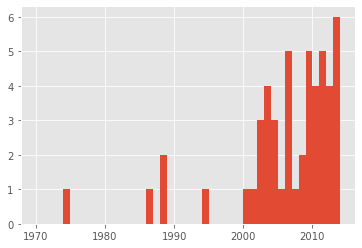

In [34]:
unrated_df = movies_df[movies_df.mpaa_rating == 'Unrated']
unrated_df.title.head(20)
plt.hist(unrated_df.thtr_rel_year, bins=44, range=(1970, 2014))
plt.show()

Hmmmmm, weird!

#### Warm-up problem

Make a bar graph that shows the numbers of films with each rating?

In [35]:
## warm-up code goes here

***

## Exporting to csv

Note that we can also export a dataframe to several common filetypes.  Let's export our `menu_df` to csv:

In [36]:
from datetime import date
today = date.today()
menu_df.to_csv('menu_dataframe_' + str(today) + '.csv')

Take a peek to see if `python` created this file in your current working directory.

The `pandas` river is wide AND DEEEEEEEEP.  There's a lot of useful functionality that we're not covering here.  If you're working on a data project and you think "Ya know, it would be great if `pandas` could do XYZ", chances are very good that `pandas` *does* do XYZ and documentation is just a Google away.

***

## In summary

What happened above was a somewhat involved intro to how Pandas structures `DataFrames` -- it's probably way more information than you will need for 95\% of your work with tabular data.  Usually, we simply import a dataset as a `dataframe` and start calculating or plotting.  The problems below will give you an idea of the types of manipulations that we most often perform when doing data analysis.  Enjoy!

***

## Problems 

Your homework is to complete two (2) of the following problems.

### Regulars

1. Obtain the [TED Talks dataset from Kaggle](https://www.kaggle.com/datasets/ashishjangra27/ted-talks).  Make histograms of watches, likes, and likes per watch.  Find the title of the most 'under-appreciated' Talk.  (You determine what is meant by this.  What would be a good metric for under-appreciatedness?)
1. Obtain the [Taxi trip data NYC](https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc) dataset.  Make histograms of trip duration (in minutes), trip distance (in miles), and average trip speed (in mph).  Make a scatter plot or 2-d histogram of trip duration vs trip distance.  Note that you'll have to do some significant parsing (processing of alphanumeric strings) of the information in the time columns to calculate the ride duration!

### Meanies

3. Obtain the [London bike sharing dataset](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset).  Make a graph that shows number of shares (aggregated over all days in the dataset) *vs* hour of the day.  What is the peak bikeshare hour?  Make a graph that shows aggregate number of bikeshares *vs* temperature.  Are Londoners cold-weather wimps?